In [1]:
import bk.load
import bk.compute
import matplotlib.pyplot as plt

import scipy.signal
import numpy as np

import bk.signal
import bk.compute
import bk.plot

import neuroseries as nts

In [2]:
bk.load.current_session_linux('/mnt/electrophy/Billel/BK-Dataset/ePhys/','Rat95/Rat95-20220418')

Rat : 95 on day : 10
Working with session Rat95-20220418 @ /mnt/electrophy/Billel/BK-Dataset/ePhys/Rat95/Rat95-20220418


True

In [5]:
TTL = bk.load.digitalin(0)

In [8]:
np.arange(0,5,1/20000)

array([0.00000e+00, 5.00000e-05, 1.00000e-04, ..., 4.99985e+00,
       4.99990e+00, 4.99995e+00])

In [13]:
%matplotlib qt
t = np.arange(0,len(TTL)/20_000,1/20_000)
plt.plot(t,TTL)

In [36]:
bk.load.current_session_linux('/mnt/electrophy/Billel/BK-Dataset/','Rat51/Rat51-20211202')

Rat : 51 on day : 19
Working with session Rat51-20211202 @ /mnt/electrophy/Billel/BK-Dataset/Rat51/Rat51-20211202


True

In [2]:
bk.load.current_session_linux('/mnt/electrophy/Billel/BK-Dataset/','Rat51/Rat51-20211208')

Rat : 51 on day : 21
Working with session Rat51-20211208 @ /mnt/electrophy/Billel/BK-Dataset/Rat51/Rat51-20211208


True

In [3]:
data = bk.load.digitalin(4)
stim = bk.compute.tone_intervals(data)
data = data[::20_000]
lfp = bk.load.lfp(1)
acc = []
for i in range(32,35):
    acc.append(bk.load.lfp(i,memmap=True))
motion = np.linalg.norm(acc,axis = 0)
acc = bk.load.lfp(34)

# lfp_stim = lfp.restrict(stim)
# np.save('lfpstim.npy',lfp_stim)

/!\ memmap is not compatible with volt_step /!\ 
/!\ memmap is not compatible with volt_step /!\ 
/!\ memmap is not compatible with volt_step /!\ 


In [4]:
f, t, sxx = scipy.signal.spectrogram(
    lfp, 1250, nperseg=1250*5, noverlap=1250*0)

f_delta = f<4
f_theta = (f>7) * (f<10)

r =  np.mean(sxx[f_theta,:],0)/np.mean(sxx[f_delta,:],0)
t_r = np.arange(0,len(r))
r = nts.Tsd(t,r,time_units='s')
# r_sm = bk.compute.nts_smooth(r,10,10)
r_sm = r

In [5]:
%matplotlib qt
fig,ax = plt.subplots(3,1,True)
ax[0].pcolormesh(t,f,np.log(sxx),shading = 'auto',vmin = 1,vmax = 8,rasterized = True)



ax[0].set_ylim(0,60)
a = ax[0].twinx()
a.plot(r_sm.as_units('s'),'white')
a.set_ylim(-5,20)
plt.sca(ax[1])
ax[1].plot(lfp.as_units('s'))
bk.plot.intervals(stim)

ax[1].set_ylim(-750,750)

# ax[2].plot(acc.as_units('s'))
ax[2].plot(acc.as_units('s').index,motion,color = 'red')

plt.suptitle(bk.load.session)
plt.tight_layout()
# plt.plot(r,'white')

/tmp/ipykernel_1275230/3302408814.py:2: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  fig,ax = plt.subplots(3,1,True)


In [55]:
bite = []
for i,j,k in os.walk('/mnt/electrophy/Billel/BK-Dataset/Rat51/Rat51-20211208/'):
    if not j:
        for l in k:
            if l == 'amplifier.dat':
                bite.append(os.path.getsize(os.path.join(i,l)))

In [56]:
import numpy as np
np.sum(bite)

37863418880

In [54]:
37863418880 / (20_000*2*35)

27045.2992

In [59]:
37863418880/ (20_000*2*35)

27045.2992

In [1]:
from imports import *

In [2]:
bk.load.current_session_linux('/media/billel/DATA/BK-DATA/','Rat95/Rat95-20220418')
states = bk.load.intervals('sleep_scoring')

cluster = np.load('spike_clusters.npy')
times = np.load('spike_times.npy')

cluster_info = pd.read_csv('cluster_info.tsv',sep = '\t')
ch_to_stru = pd.read_csv('../Rat95-channel_map.csv')

stru = [ch_to_stru['Structure'][i == ch_to_stru['Intan']].values[0] for i in cluster_info['ch']]
cluster_info['Region'] = stru

mua_id = cluster_info['cluster_id'][cluster_info.group == 'mua'].values

neurons = []
metadata = []
for id in mua_id:   
    n = nts.Ts(times[np.where(cluster == id)]/20_000,'s')
    metadata.append(cluster_info[cluster_info.cluster_id == id])
    neurons.append(n)

Rat : 95 on day : 10
Working with session Rat95-20220418 @ /media/billel/DATA/BK-DATA/Rat95/Rat95-20220418


In [18]:
metadata = pd.concat(metadata)

In [19]:
laser_intervals = bk.load.intervals('laser')
laser_intervals = laser_intervals.drop_short_intervals(20,'s').reset_index(drop = True)

In [20]:
t,p = bk.compute.psth(neurons,laser_intervals.as_units('s').start.values,0.5,[-1000,1000],True)

21it [00:00, 1680.15it/s]


Text(0, 0.5, 'FR (Zscore)')

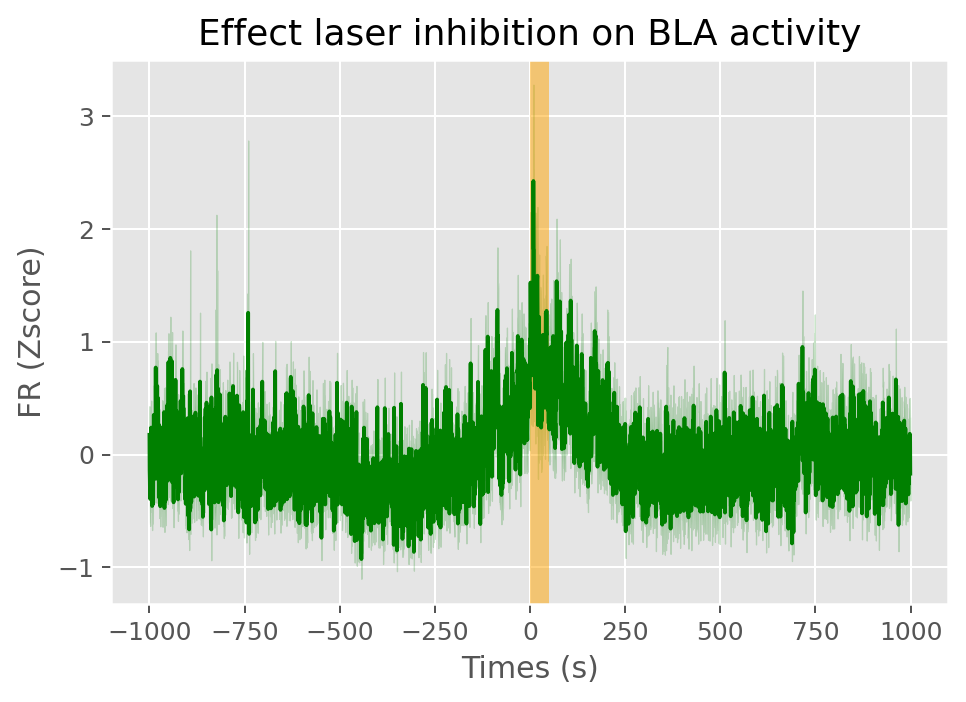

In [42]:
p_z = zscore(p,0)
fig,ax = plt.subplots(1,1,dpi = 180)
bk.plot.confidence_intervals(t,p_z.T,style = 'green',ax = ax)
bk.plot.intervals(nts.IntervalSet(0,50,'s'),ax = ax)
plt.title('Effect laser inhibition on BLA activity')
plt.xlabel('Times (s)')
plt.ylabel('FR (Zscore)')

In [13]:
pre = nts.IntervalSet(0,8687206,'ms')
post = nts.IntervalSet(10481292,21544480,'ms')

In [5]:
%matplotlib qt
fig,ax = plt.subplots(2,1,True)
ax[0].plot(acc.as_units('s'))
bk.plot.intervals(states['NREM'],'grey',ax = ax[1])
bk.plot.intervals(states['REM'],ax = ax[1])

/tmp/ipykernel_126934/1871397699.py:2: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  fig,ax = plt.subplots(2,1,True)


NameError: name 'acc' is not defined

In [14]:
states['NREM'] = states['NREM'].drop_short_intervals(5,'s').reset_index(drop = True)
states['REM'] = states['REM'].merge_close_intervals(5,'s')

In [15]:
pre_state = {}
post_state = {}
for state in states:
    pre_state[state] = states[state].intersect(pre)
    post_state[state] = states[state].intersect(post)


In [16]:
neurons = np.array(neurons)

In [21]:
intervals_pre,times_pre = bk.compute.transition(pre_state,['NREM','REM'],30)
activity_pre = bk.compute.compute_transition_activity(neurons[metadata.Region == 'BLA'],intervals_pre,times_pre,[30,12],2)

intervals_post,times_post = bk.compute.transition(post_state,['NREM','REM'],30)
activity_post = bk.compute.compute_transition_activity(neurons[metadata.Region == 'BLA'],intervals_post,times_post,[30,12],2)


intervals,times = bk.compute.transition(states,['NREM','REM'],30)
activity = bk.compute.compute_transition_activity(neurons[metadata.Region == 'BLA'],intervals,times,[30,12],2)

In [24]:
fig, ax = plt.subplots(1,2,dpi = 200)
ax[0].plot(np.mean(np.mean(activity_pre,2),0))
ax[0].set_title('PRE')
ax[0].set_xlabel('Time Normalized')
ax[0].set_ylabel('FR')
ax[0].set_ylim(0,5)
bk.plot.intervals(nts.IntervalSet(29,41,'s'),ax = ax[0])

ax[1].plot(np.mean(np.mean(activity_post,2),0))
ax[1].set_title('POST')
ax[1].set_xlabel('Time Normalized')
ax[1].set_ylabel('FR')
ax[1].set_ylim(0,5)

bk.plot.intervals(nts.IntervalSet(29,41,'s'),ax = ax[1])

# ax[2].plot(np.mean(np.mean(activity,2),0))

# ax[2].set_title('ALL')
# ax[2].set_xlabel('Time Normalized')
# ax[2].set_ylabel('FR')
# ax[2].set_ylim(0,5)

# bk.plot.intervals(nts.IntervalSet(29,41,'s'),ax = ax[2])
plt.tight_layout()

In [101]:
pre_lfp = bk.load.lfp_in_intervals(80,pre_state['REM'].drop_short_intervals(30,'s'))
post_lfp = bk.load.lfp_in_intervals(80,post_state['REM'].drop_short_intervals(30,'s'))

In [102]:
t,Sxx_PRE = scipy.signal.welch(pre_lfp.values,1250,nperseg=5000,noverlap=2500)
t,Sxx_POST = scipy.signal.welch(post_lfp.values,1250,nperseg=5000,noverlap=2500)

In [103]:
%matplotlib qt 

plt.plot(t,np.log(Sxx_PRE))
plt.plot(t,np.log(Sxx_POST))
plt.xlim(0,100)
plt.ylim(0,10)

(0.0, 10.0)